In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs

In [3]:
X,Y = make_blobs(n_samples=500,n_features=2,centers=5,random_state=3)

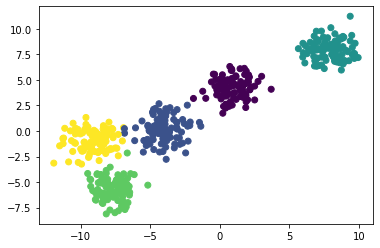

In [4]:
plt.figure(0)
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [13]:
def initalise():
    clusters = {}
    color = ['red','green','yellow','blue','purple']

    for i in range(5):
        center = 10*(2*np.random.random((X.shape[1],))-1)
        points = []
        cluster = {
            'points':points,
            'color':color[i],
            'center':center,
        }
        clusters[i] = cluster

    return clusters

In [75]:
def distance(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))
def assignValues(clusters,X):
    for i in range(X.shape[0]):
        dist = []
        for ix in range(5):
            d = distance(clusters[ix]['center'],X[i])
            dist.append(d)
        idx = np.argmin(dist)
        clusters[idx]['points'].append(X[i])
    
    return clusters

def plotKmeans(clusters):
    for ix in range(5):
        pts = np.array(clusters[ix]['points'])

        if(len(pts)>0):
            plt.scatter(pts[:,0],pts[:,1],color=clusters[ix]['color'])

        cent = np.array(clusters[ix]['center'])
        plt.scatter(cent[0],cent[1],color='black',marker='*')

def updateCluster(clusters):

    for i in range(5):
        pts = np.array(clusters[i]['points'])

        if(len(pts)>0):
            new_cent = np.mean(pts,axis=0)
            clusters[i]['center'] = new_cent
            clusters[i]['points'] = []
    
    return clusters

In [69]:
clust = initalise()
clust = assignValues(clust,X)

{0: {'points': [], 'color': 'red', 'center': array([-5.82242918, -9.28236377])}, 1: {'points': [], 'color': 'green', 'center': array([ 0.55142737, -6.15829384])}, 2: {'points': [], 'color': 'yellow', 'center': array([-6.18643448,  0.89314267])}, 3: {'points': [], 'color': 'blue', 'center': array([-3.57094535, -1.92046642])}, 4: {'points': [], 'color': 'purple', 'center': array([-4.06409886, -9.10736785])}}


84
0
187
229
0


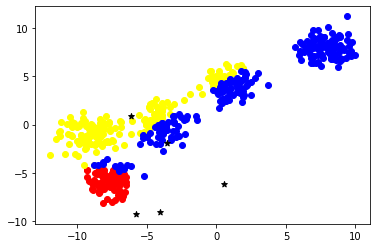

In [70]:
plotKmeans(clust)

In [71]:
clust = updateCluster(clust)

{0: {'points': [], 'color': 'red', 'center': array([-5.43595719,  5.52468435])}, 1: {'points': [], 'color': 'green', 'center': array([-0.53160032,  0.00801147])}, 2: {'points': [], 'color': 'yellow', 'center': array([0.2527419 , 6.26104706])}, 3: {'points': [], 'color': 'blue', 'center': array([-5.35551083, -6.62775314])}, 4: {'points': [], 'color': 'purple', 'center': array([8.33397763, 5.63142043])}}


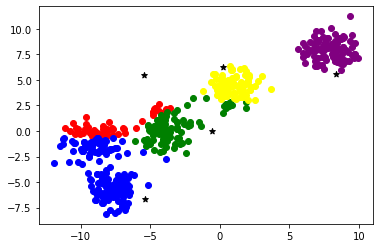

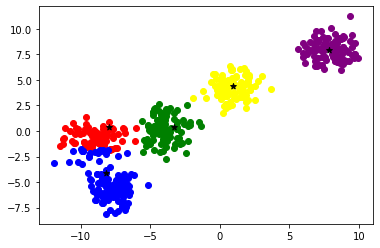

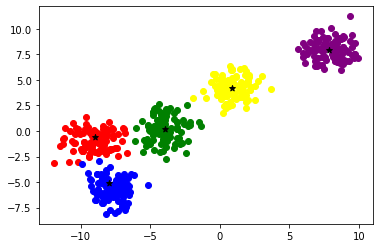

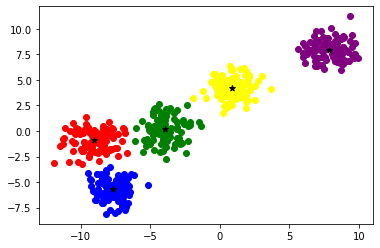

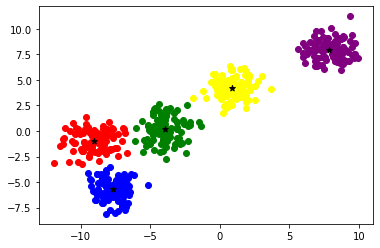

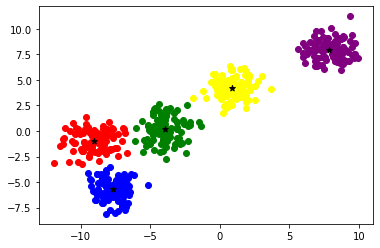

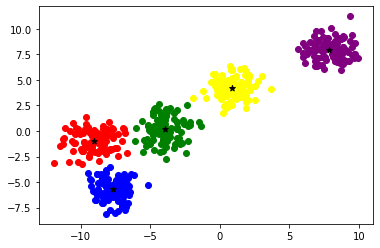

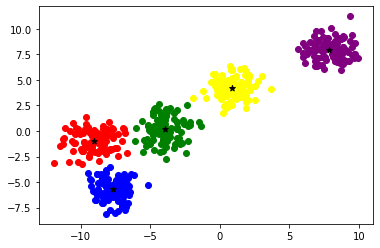

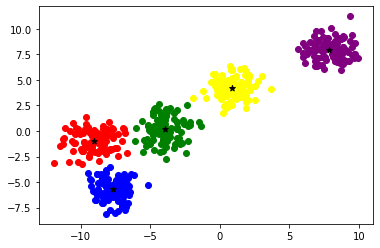

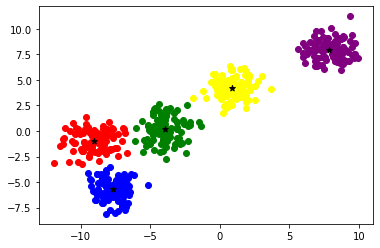

In [81]:
clust = initalise()
for i in range(10):
    clust = assignValues(clust,X)
    plotKmeans(clust)
    clust = updateCluster(clust)
    plt.show()